1. Importing Libraries & Dataset and viewing Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.metrics import roc_curve
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded=files.upload()
dataset=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
dataset.head()#to view top five rows of a data frame

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling.csv


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Checking Data type, Statistical summmary, shape, null values, etc.

In [3]:
#To find what all columns it contains, of what types and if they contain any value in it or not
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Hence from above we get that our data does not contain any null value

In [4]:
dataset.shape #to display shape of dataframe

(5000, 14)

In [5]:
dataset.describe() #to show basic stats of each column

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


From above we get to know about stats of each column in our dataset. This table shows that our Experience column contains some negative values which means our dataset conatins some faulty data.

In [6]:
#counting number of values less than 0 in Experience column
dataset[dataset['Experience']<0]['Experience'].count()

52

In [7]:
#ID can be ignored because any ID can be given to any customer
dataset = dataset.drop(columns='ID',axis=1)

In [8]:
dataset.isnull().sum() #check any null value 

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
#give details about dataset and it will be random sample
dataset.sample(5) 

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
24,36,11,152,95521,2,3.9,1,159,0,0,0,0,1
4125,60,34,95,94104,2,0.7,2,322,0,0,0,1,1
3542,30,5,118,92182,4,3.0,3,0,1,0,0,1,0
3645,42,17,79,92103,1,3.7,3,0,0,1,0,0,1
738,36,10,80,94596,4,2.2,2,0,0,0,0,1,0


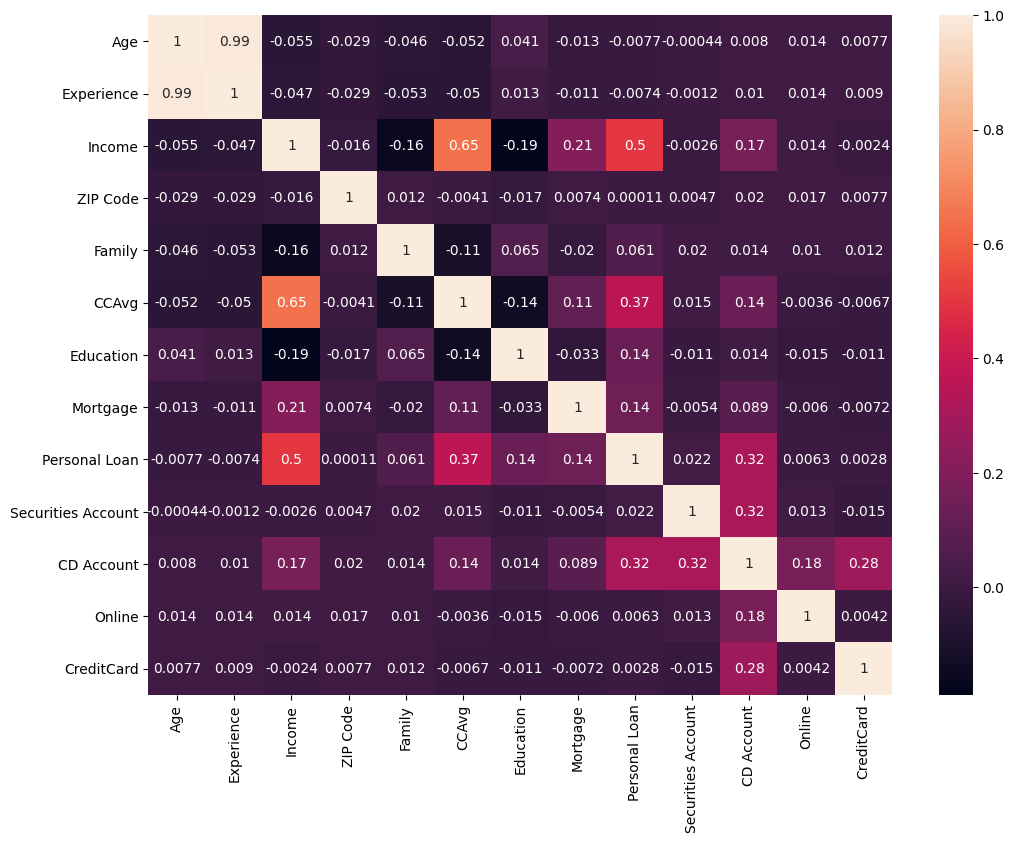

In [10]:
'''Heatmaps can give a more comprehensive overview of how users are really behaving. Heatmaps are also a lot more
visual than standard analytics reports, which can make them easier to analyse at a glance.'''
 #Compute pairwise correlation of columns, excluding NA/null values.
plt.subplots(figsize =(12,9),dpi=100) 
sns.heatmap(dataset.corr(),annot=True)

In [11]:
'''As we can see from the above heatmap Experience and Age are highly correalted'''
#finding correlation between Experience and Age
inc=dataset['Experience']
avg=dataset['Age']
co1=inc.corr(avg)
co1

0.9942148569683321

In [12]:
#We get that  Experince and Age are highly correlated so, we can drop experience column as well because it contains some negative values as well.
dataset = dataset.drop(columns='Experience',axis=1)

2. EDA: Study of the data distribution in each attribute and target variable, share your findings.

In [13]:
#to find number of unique in each column
dataset.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [14]:
#As from above unique value table we can see that there are 467 unique ZIP Code. So dropping ZIP Code as well
dataset=dataset.drop('ZIP Code',axis=1)

In [15]:
#counting occurences of people with zero Mortgage 
dataset[dataset['Mortgage']==0]['Mortgage'].count()

3462

In [16]:
#counting occurences with zero Credit Card spending per month 
dataset[dataset['CCAvg']==0]['CCAvg'].count()

106

Univariate, Bivariate and Multivariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8005e9a5f8>,
      dtype=object)

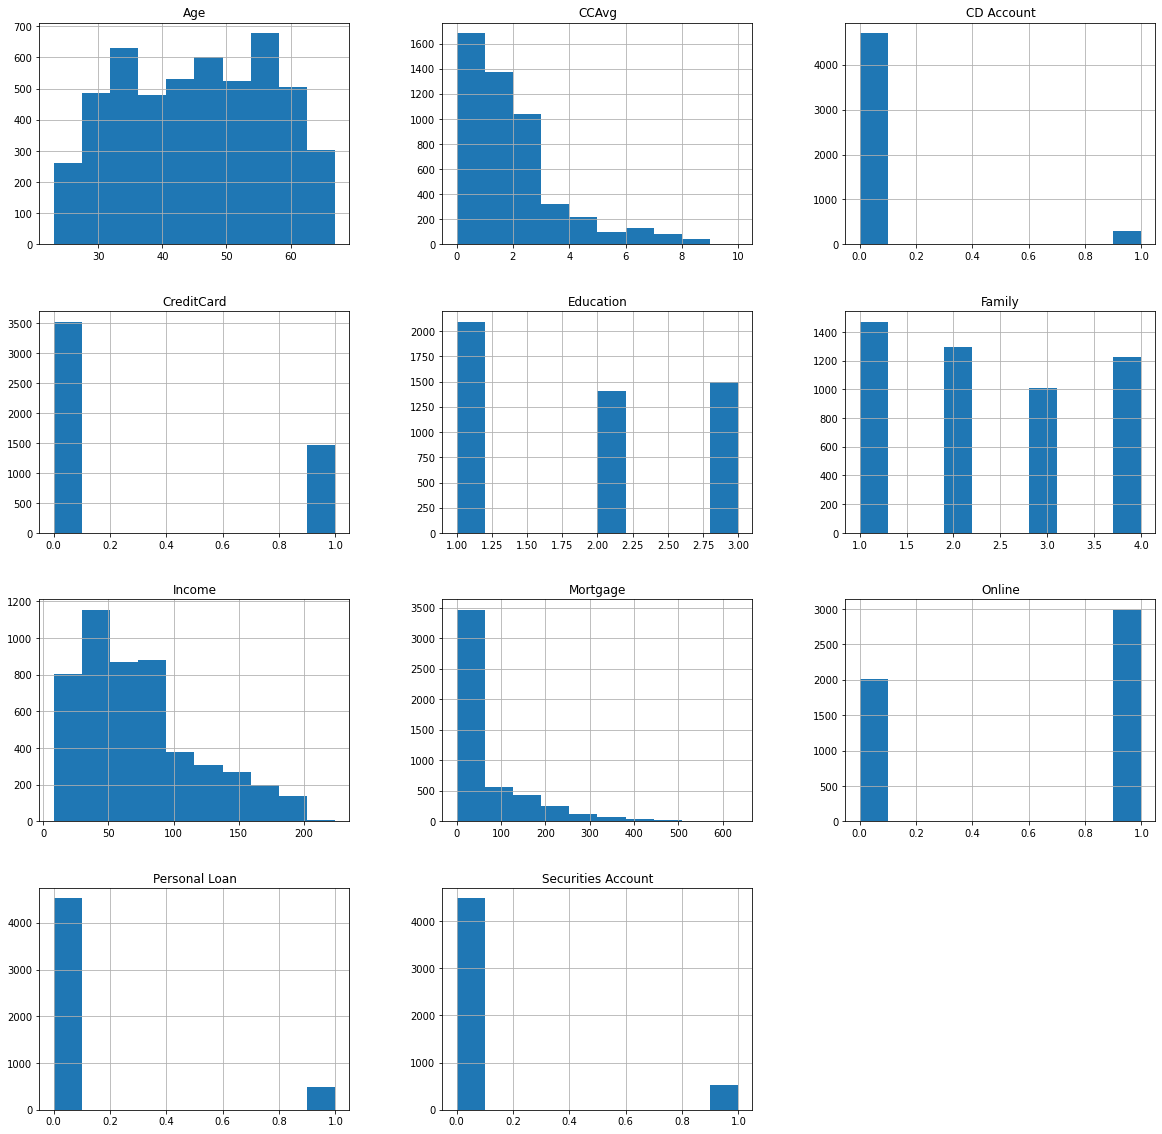

In [17]:
#Plotting histogram for the required column to get the insight
dataset.hist(column=['Age','Mortgage','CreditCard','Online','Personal Loan','Securities Account','CD Account','Education','Income','CCAvg','Family'],figsize=(20,20))

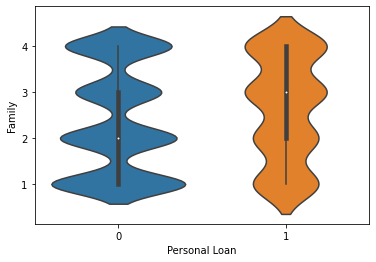

In [18]:
#Violin Plot is a method to visualize the distribution of numerical data of different variables. 
#It is similar to Box Plot but with a rotated plot on each side, giving more information.
#violinplot Personal Loan and Family
sns.violinplot(x='Personal Loan',y='Family',data=dataset)
plt.show()

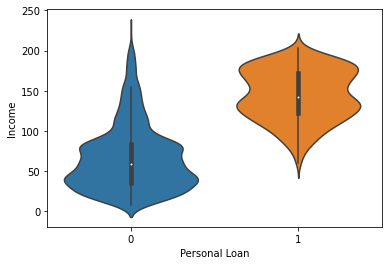

In [19]:
#violinplot Personal Loan and Income
sns.violinplot(x='Personal Loan',y='Income',data=dataset)
plt.show()
#this shows that customers who took personal loan have higher income than customers who do not take personal loan

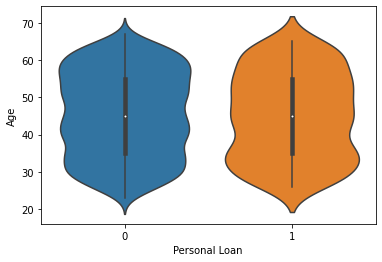

In [20]:
#vioplot Personal Loan and Age
sns.violinplot(x='Personal Loan',y='Age',data=dataset)
plt.show()

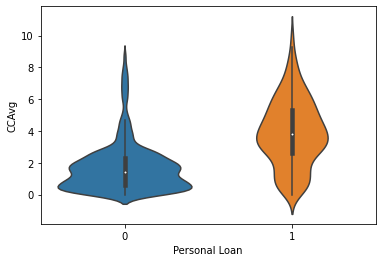

In [21]:
#vioplot Personal Loan and CCAvg
sns.violinplot(x='Personal Loan',y='CCAvg',data=dataset)
plt.show()
# this shows that CCAvg is high when a customer takes peronal loan

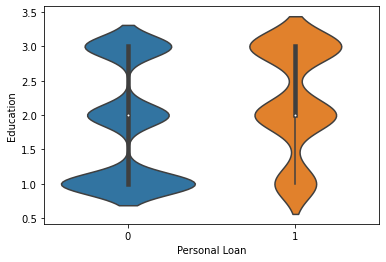

In [22]:
#vioplot Personal Loan and Education
sns.violinplot(x='Personal Loan',y='Education',data=dataset)
plt.show()

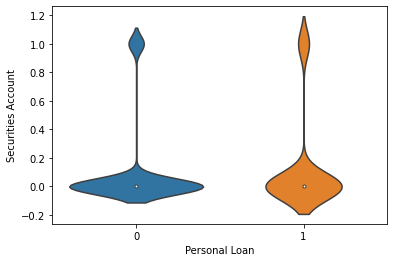

In [23]:
#vioplot Personal Loan and Securities Account
sns.violinplot(x='Personal Loan',y='Securities Account',data=dataset)
plt.show()

In [24]:
#Multivariate analysis using seaborn pairplots.It shows a clear and nice view of all variables and 
#their realtion ship with all other variables
sns.set_style("whitegrid")
sns.pairplot(dataset,height=10)

'''From above analysis we get:
1. Income is skewed
2. CCAvg is also skewed
3. The columns Family and Education are ordinal variables.'''

In [25]:
#Datatype of all categorical columns
dataset[['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']].dtypes

Family                int64
Education             int64
Personal Loan         int64
Securities Account    int64
CD Account            int64
Online                int64
CreditCard            int64
dtype: object

In [26]:
#value count of all categorical column
#1.Family
dataset['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [27]:
#2.Education
dataset['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [28]:
#3.Personal Loan
dataset['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [29]:
#From above we get that only few people with high Income take Personal Loan

In [30]:
#4.Securities Account
dataset['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [31]:
#from above we get only few people with securities account

In [32]:
#5.CD Account
dataset['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [33]:
#Only few people have CD Account

In [34]:
#6.Online
dataset['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [35]:
#7.CreditCard
dataset['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [36]:
#From above we can see that there is a not a balance in the dataset provided in some columns

4.Transformation of feature variables/Normalizing of Data

In [37]:
#We take Personal Loan because it is our target on which we have to perform our observation
X = dataset.drop('Personal Loan', axis=1)
Y = dataset['Personal Loan']

In [38]:
print(X)
print(Y)

      Age  Income  Family  ...  CD Account  Online  CreditCard
0      25      49       4  ...           0       0           0
1      45      34       3  ...           0       0           0
2      39      11       1  ...           0       0           0
3      35     100       1  ...           0       0           0
4      35      45       4  ...           0       0           1
...   ...     ...     ...  ...         ...     ...         ...
4995   29      40       1  ...           0       1           0
4996   30      15       4  ...           0       1           0
4997   63      24       2  ...           0       0           0
4998   65      49       3  ...           0       1           0
4999   28      83       3  ...           0       1           1

[5000 rows x 10 columns]
0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64


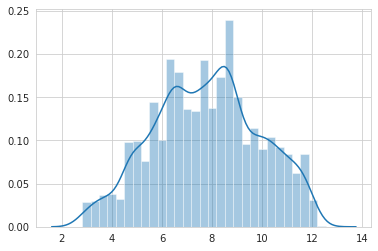

In [39]:
#Applying necessary transformation for feature varaibles
sc=PowerTransformer(method='box-cox',standardize=False)
sc.fit(X['Income'].values.reshape(-1,1))
t=sc.transform(X['Income'].values.reshape(-1,1))
X['Income']=pd.Series(t.flatten())
sns.distplot(t)

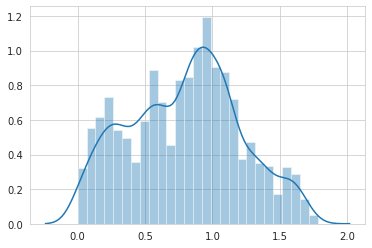

In [40]:
sc=PowerTransformer(method='yeo-johnson',standardize=False)
sc.fit(X['CCAvg'].values.reshape(-1,1))
t=sc.transform(X['CCAvg'].values.reshape(-1,1))
X['CCAvg']=pd.Series(t.flatten())
sns.distplot(t)

In [41]:
#Here we are transforming Mortgage Column by using label encoding
X['Mort']=pd.cut(X['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
X.drop('Mortgage',axis=1,inplace=True)

In [42]:
print(X.head())
print(Y.head())

   Age    Income  Family     CCAvg  ...  CD Account  Online  CreditCard  Mort
0   25  6.994487       4  0.845160  ...           0       0           0     0
1   45  5.974230       3  0.814478  ...           0       0           0     0
2   39  3.402765       1  0.633777  ...           0       0           0     0
3   35  9.309254       1  1.107427  ...           0       0           0     0
4   35  6.747451       4  0.633777  ...           0       0           1     0

[5 rows x 10 columns]
0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64


5.Splitting Data to train and test

In [43]:
#stratified sampling is a method of sampling from a population which can be partitioned into subpopulations.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y,random_state=0)

In [44]:
#Printing x_train,x_test,y_train,y_test
print("X_TRAIN",x_train,sep="\n")
print("X_TEST",x_test,sep="\n")
print("Y_TRAIN",y_train,sep='\n')
print("Y_TEST",y_test,sep="\n")

X_TRAIN
      Age     Income  Family     CCAvg  ...  CD Account  Online  CreditCard  Mort
3789   51   5.093320       3  0.322049  ...           0       1           1     0
758    64   6.051442       1  0.814478  ...           0       0           0     0
2868   52   5.732274       4  0.902279  ...           0       1           1     0
2550   32   4.664963       1  0.384645  ...           0       1           0     1
2150   62   7.283553       1  0.544710  ...           0       0           1     0
...   ...        ...     ...       ...  ...         ...     ...         ...   ...
3597   56   7.112564       3  0.954467  ...           0       1           0     0
4670   52  11.909951       1  0.874387  ...           0       1           0     0
988    63   5.814738       1  0.928941  ...           0       0           0     0
2037   35   7.170350       2  0.633777  ...           0       0           1     0
2174   30  10.071079       2  1.179285  ...           0       1           0     0

[3500 r

In [45]:
#Printing shape of x_train, x_test, y_train, y_test
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3500, 10), (1500, 10), (3500,), (1500,))

In [46]:
#Scaling Train and Test data
scaler = StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Logistic Regression Model

In [47]:
#Fitting Logistic regression model
logistic=LogisticRegression(random_state=0)
logistic.fit(x_train,y_train)
y_pred=logistic.predict(x_test)
yt_pred=logistic.predict(x_train)

In [48]:
#cross_val_score returns score of test fold
scores=cross_val_score(logistic,x_train,y_train,cv=10)
scores

array([0.95428571, 0.96      , 0.93142857, 0.95714286, 0.95714286,
       0.95714286, 0.95714286, 0.95428571, 0.97142857, 0.96      ])

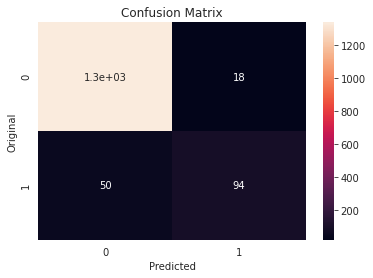

In [49]:
'''A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a
set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.'''
confusion_matrix=pd.crosstab(y_test,y_pred)
sns.heatmap(confusion_matrix,annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Original")
plt.show()

In [50]:
#storing elements TP, FN, TN, FP of a confusion matrix
TP=confusion_matrix.iloc[1,1]
FN=confusion_matrix.iloc[1,0]
TN=confusion_matrix.iloc[0,0]
FP=confusion_matrix.iloc[0,1]

In [51]:
#Accuracy of Training Data and Testing Data
acc_test=accuracy_score(y_test,y_pred)
print("Test Accuracy: ",acc_test)
acc_train=accuracy_score(y_train,yt_pred)
print("Train Accuracy: ",acc_train)

Test Accuracy:  0.9546666666666667
Train Accuracy:  0.9568571428571429


In [52]:
'''Calculating Recall
Recall can be defined as the ratio of the total number of correctly classified positive examples divide to the total
number of positive examples. High Recall indicates the class is correctly recognized (a small number of FN)'''
recall=(TP/(TP+FN))*100
print("Recall is: ",recall)

Recall is:  65.27777777777779


In [53]:
'''Calculating Precision
To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples.
High Precision indicates an example labelled as positive is indeed positive (a small number of FP)'''
precision=(TP/(TP+FP))*100
print("Precision is: ",precision)

Precision is:  83.92857142857143


In [54]:
'''Calculating F-measure
Since we have two measures (Precision and Recall) it helps to have a measurement that represents both of them. We calculate an F-measure which uses
Harmonic Mean in place of Arithmetic Mean as it punishes the extreme values more. The F-Measure will always be nearer to the smaller value of Precision or 
Recall.'''
f_measure=(2*recall*precision)/(recall+precision)
print("F-measure is: ",f_measure)

F-measure is:  73.43750000000001


In [55]:
#Testing Performance of Logistic Regression
pred_prob1 = logistic.predict_proba(x_test)
'''Plotting ROC curve AUC - ROC curve is a performance measurement for classification problem at various thresholds settings.
ROC (receiver operating characteristic curve) is a probability curve and AUC represents degree or measure of separability.
It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.'''
fpr, tpr, thresh = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

In [56]:
#Calculating auc score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score1

0.9656926007866273

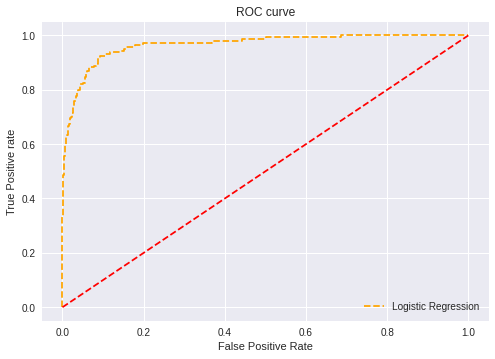

In [57]:
#Plotting AUC-ROC Curve
plt.style.use('seaborn')
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

Random Forest Model

In [58]:
#Fitting Random Forest classifier to data set
classifier=RandomForestClassifier(random_state=0,n_estimators=500,max_depth=9)
classifier.fit(x_train,y_train)
yRt_pred=classifier.predict(x_train)
yR_pred=classifier.predict(x_test)

In [59]:
#cross_val_score returns score of test fold
scoresR=cross_val_score(classifier,x_train,y_train,cv=10)
scoresR

array([0.98571429, 1.        , 0.98285714, 0.98571429, 0.98285714,
       0.97428571, 0.98571429, 0.98571429, 0.99142857, 0.98571429])

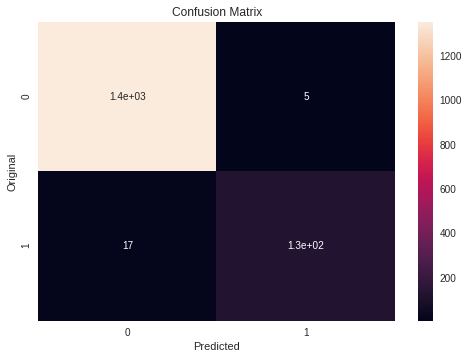

In [60]:
'''A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a
set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.'''
confusion_matrix=pd.crosstab(y_test,yR_pred)
sns.heatmap(confusion_matrix,annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Original")
plt.show()

In [61]:
#Accuracy of Training Data and Testing Data
acc_testR=accuracy_score(y_test,yR_pred)
print("Test Accuracy: ",acc_testR)
acc_trainR=accuracy_score(y_train,yRt_pred)
print("Train Accuracy: ",acc_trainR)

Test Accuracy:  0.9853333333333333
Train Accuracy:  0.9968571428571429


In [62]:
#storing elements TP, FN, TN, FP of a confusion matrix
TPR=confusion_matrix.iloc[1,1]
FNR=confusion_matrix.iloc[1,0]
TNR=confusion_matrix.iloc[0,0]
FPR=confusion_matrix.iloc[0,1]

In [63]:
'''Calculating Recall
Recall can be defined as the ratio of the total number of correctly classified positive examples divide to the total
number of positive examples. High Recall indicates the class is correctly recognized (a small number of FN)'''
recallR=(TPR/(TPR+FNR))*100
print("Recall is: ",recallR)

Recall is:  88.19444444444444


In [64]:
'''Calculating Precision
To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples.
High Precision indicates an example labelled as positive is indeed positive (a small number of FP)'''
precisionR=(TPR/(TPR+FPR))*100
print("Precision is: ",precisionR)

Precision is:  96.21212121212122


In [65]:
'''Calculating F-measure
Since we have two measures (Precision and Recall) it helps to have a measurement that represents both of them. We calculate an F-measure which uses
Harmonic Mean in place of Arithmetic Mean as it punishes the extreme values more. The F-Measure will always be nearer to the smaller value of Precision or 
Recall.'''
f_measureR=(2*recallR*precisionR)/(recallR+precisionR)
print("F-measure is: ",f_measureR)

F-measure is:  92.02898550724639


In [66]:
#Testing Performance of Random Forest
pred_prob1R = classifier.predict_proba(x_test)
'''Plotting ROC curve AUC - ROC curve is a performance measurement for classification problem at various thresholds settings.
ROC (receiver operating characteristic curve) is a probability curve and AUC represents degree or measure of separability.
It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.'''
fpR, tpR, threshR = roc_curve(y_test, pred_prob1R[:,1], pos_label=1)

In [67]:
#Calculating auc score
auc_scoreR = roc_auc_score(y_test, pred_prob1R[:,1])
auc_scoreR

0.996666052114061

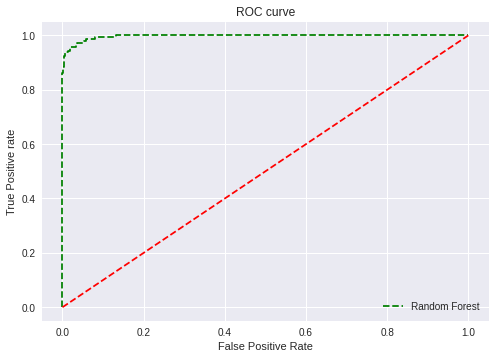

In [68]:
#Plotting AUC-ROC Curve
plt.style.use('seaborn')
plt.plot(fpR, tpR, linestyle='--',color='green', label='Random Forest')
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

KNN Model

In [69]:
#Fitting K-NN classifier to the training set  
classK= KNeighborsClassifier(n_neighbors=5)  
classK.fit(x_train, y_train)  
yKt_pred=classK.predict(x_train)
yK_pred=classK.predict(x_test)

In [70]:
#cross_val_score returns score of test fold
scoresK=cross_val_score(classK,x_train,y_train,cv=10)
scoresK

array([0.96      , 0.96571429, 0.94571429, 0.96857143, 0.96285714,
       0.94571429, 0.94571429, 0.96285714, 0.95714286, 0.94571429])

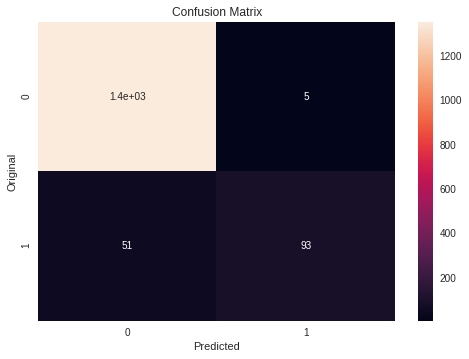

In [71]:
'''A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a
set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.'''
confusion_matrixK=pd.crosstab(y_test,yK_pred)
sns.heatmap(confusion_matrixK,annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Original")
plt.show()

In [72]:
#Accuracy of Training Data and Testing Data
acc_testK=accuracy_score(y_test,yK_pred)
print("Test Accuracy: ",acc_testK)
acc_trainK=accuracy_score(y_train,yKt_pred)
print("Train Accuracy: ",acc_trainK)

Test Accuracy:  0.9626666666666667
Train Accuracy:  0.9685714285714285


In [73]:
#storing elements TP, FN, TN, FP of a confusion matrix
TPK=confusion_matrixK.iloc[1,1]
FNK=confusion_matrixK.iloc[1,0]
TNK=confusion_matrixK.iloc[0,0]
FPK=confusion_matrixK.iloc[0,1]

In [74]:
'''Calculating Recall
Recall can be defined as the ratio of the total number of correctly classified positive examples divide to the total
number of positive examples. High Recall indicates the class is correctly recognized (a small number of FN)'''
recallK=(TPK/(TPK+FNK))*100
print("Recall is: ",recallK)

Recall is:  64.58333333333334


In [75]:
'''Calculating Precision
To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples.
High Precision indicates an example labelled as positive is indeed positive (a small number of FP)'''
precisionK=(TPK/(TPK+FPK))*100
print("Precision is: ",precisionK)

Precision is:  94.89795918367348


In [76]:
'''Calculating F-measure
Since we have two measures (Precision and Recall) it helps to have a measurement that represents both of them. We calculate an F-measure which uses
Harmonic Mean in place of Arithmetic Mean as it punishes the extreme values more. The F-Measure will always be nearer to the smaller value of Precision or 
Recall.'''
f_measureK=(2*recallK*precisionK)/(recallK+precisionK)
print("F-measure is: ",f_measureK)

F-measure is:  76.85950413223142


In [77]:
#Testing Performance of KNN
pred_prob1K = classK.predict_proba(x_test)
'''Plotting ROC curve AUC - ROC curve is a performance measurement for classification problem at various thresholds settings.
ROC (receiver operating characteristic curve) is a probability curve and AUC represents degree or measure of separability.
It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.'''
fpK, tpK, threshK = roc_curve(y_test, pred_prob1K[:,1], pos_label=1)

In [78]:
#Calculating auc score
auc_scoreK = roc_auc_score(y_test, pred_prob1K[:,1])
auc_scoreK

0.9366524295313012

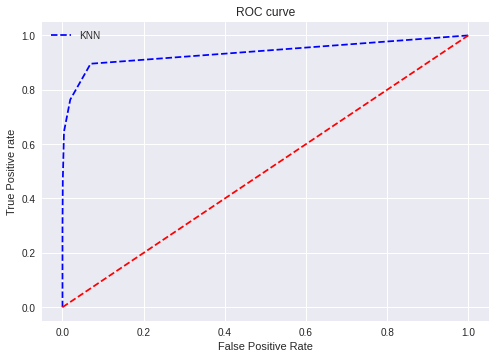

In [79]:
#Plotting AUC-ROC Curve
plt.style.use('seaborn')
plt.plot(fpK, tpK, linestyle='--',color='blue', label='KNN')
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

Naive Bayes Model

In [80]:
#Create a Gaussian Classifier
gnb = GaussianNB()
#Train the model using the training sets
gnb.fit(x_train, y_train)
#Predict the response for test and train dataset
yN_pred = gnb.predict(x_test)
yNt_pred=gnb.predict(x_train)

In [81]:
#cross_val_score returns score of test fold
scoresN=cross_val_score(gnb,x_train,y_train,cv=10)
scoresN

array([0.92      , 0.90285714, 0.92571429, 0.90857143, 0.92285714,
       0.89142857, 0.90857143, 0.9       , 0.90857143, 0.89428571])

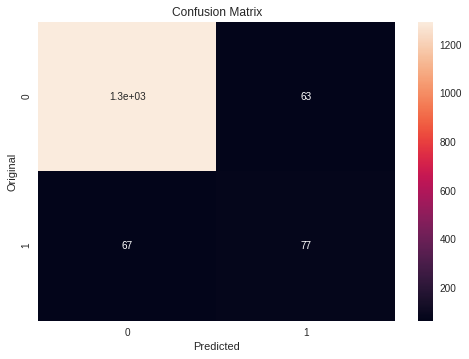

In [82]:
'''A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a
set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.'''
confusion_matrixN=pd.crosstab(y_test,yN_pred)
sns.heatmap(confusion_matrixN,annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Original")
plt.show()

In [83]:
#Accuracy of Training Data and Testing Data
acc_testN=accuracy_score(y_test,yN_pred)
print("Test Accuracy: ",acc_testN)
acc_trainN=accuracy_score(y_train,yNt_pred)
print("Train Accuracy: ",acc_trainN)

Test Accuracy:  0.9133333333333333
Train Accuracy:  0.9085714285714286


In [84]:
#storing elements TP, FN, TN, FP of a confusion matrix
TPN=confusion_matrixN.iloc[1,1]
FNN=confusion_matrixN.iloc[1,0]
TNN=confusion_matrixN.iloc[0,0]
FPN=confusion_matrixN.iloc[0,1]

In [85]:
'''Calculating Recall
Recall can be defined as the ratio of the total number of correctly classified positive examples divide to the total
number of positive examples. High Recall indicates the class is correctly recognized (a small number of FN)'''
recallN=(TPN/(TPN+FNN))*100
print("Recall is: ",recallN)

Recall is:  53.47222222222222


In [86]:
'''Calculating Precision
To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples.
High Precision indicates an example labelled as positive is indeed positive (a small number of FP)'''
precisionN=(TPN/(TPN+FPN))*100
print("Precision is: ",precisionN)

Precision is:  55.00000000000001


In [87]:
'''Calculating F-measure
Since we have two measures (Precision and Recall) it helps to have a measurement that represents both of them. We calculate an F-measure which uses
Harmonic Mean in place of Arithmetic Mean as it punishes the extreme values more. The F-Measure will always be nearer to the smaller value of Precision or 
Recall.'''
f_measureN=(2*recallN*precisionN)/(recallN+precisionN)
print("F-measure is: ",f_measureN)

F-measure is:  54.22535211267606


In [88]:
#Testing Performance of Naive Bayes
pred_prob1N = gnb.predict_proba(x_test)
'''Plotting ROC curve AUC - ROC curve is a performance measurement for classification problem at various thresholds settings.
ROC (receiver operating characteristic curve) is a probability curve and AUC represents degree or measure of separability.
It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.'''
fpN, tpN, threshN = roc_curve(y_test, pred_prob1N[:,1], pos_label=1)

In [89]:
#Calculating auc score
auc_scoreN = roc_auc_score(y_test, pred_prob1N[:,1])
auc_scoreN

0.9392822025565388

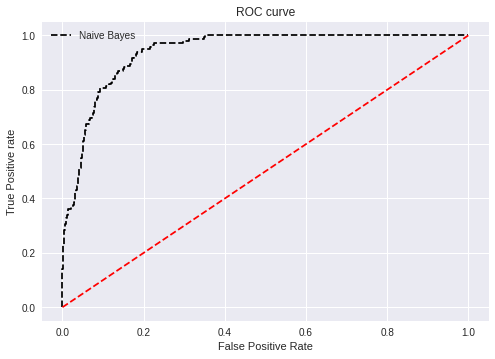

In [90]:
#Plotting AUC-ROC Curve
plt.style.use('seaborn')
plt.plot(fpN, tpN, linestyle='--',color='black', label='Naive Bayes')
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

Decision Tree

In [91]:
#Fitting Decision Tree classifier to data set
decisiontree = DecisionTreeClassifier(random_state=0,max_depth=9) 
decisiontree.fit(x_train,y_train)
yDt_pred=decisiontree.predict(x_train)
yD_pred=decisiontree.predict(x_test)

In [92]:
#cross_val_score returns score of test fold
scoresD=cross_val_score(decisiontree,x_train,y_train,cv=10)
scoresD

array([0.98      , 0.99142857, 0.98285714, 0.97428571, 0.98      ,
       0.96857143, 0.98571429, 0.98571429, 0.98857143, 0.98285714])

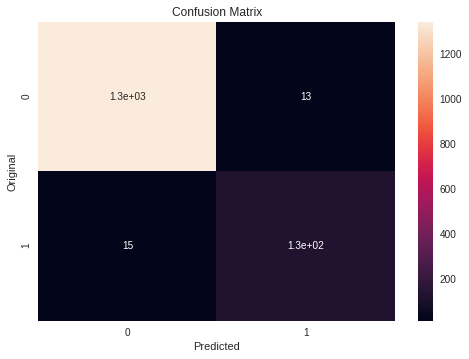

In [93]:
'''A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a
set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.'''
confusion_matrixD=pd.crosstab(y_test,yD_pred)
sns.heatmap(confusion_matrixD,annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Original")
plt.show()

In [94]:
#Accuracy of Training Data and Testing Data
acc_testD=accuracy_score(y_test,yD_pred)
print("Test Accuracy: ",acc_testD)
acc_trainD=accuracy_score(y_train,yDt_pred)
print("Train Accuracy: ",acc_trainD)

Test Accuracy:  0.9813333333333333
Train Accuracy:  0.9971428571428571


In [95]:
#storing elements TP, FN, TN, FP of a confusion matrix
TPD=confusion_matrixD.iloc[1,1]
FND=confusion_matrixD.iloc[1,0]
TND=confusion_matrixD.iloc[0,0]
FPD=confusion_matrixD.iloc[0,1]

In [96]:
'''Calculating Recall
Recall can be defined as the ratio of the total number of correctly classified positive examples divide to the total
number of positive examples. High Recall indicates the class is correctly recognized (a small number of FN)'''
recallD=(TPD/(TPD+FND))*100
print("Recall is: ",recallD)

Recall is:  89.58333333333334


In [97]:
'''Calculating Precision
To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples.
High Precision indicates an example labelled as positive is indeed positive (a small number of FP)'''
precisionD=(TPD/(TPD+FPD))*100
print("Precision is: ",precisionD)

Precision is:  90.84507042253522


In [98]:
'''Calculating F-measure
Since we have two measures (Precision and Recall) it helps to have a measurement that represents both of them. We calculate an F-measure which uses
Harmonic Mean in place of Arithmetic Mean as it punishes the extreme values more. The F-Measure will always be nearer to the smaller value of Precision or 
Recall.'''
f_measureD=(2*recallD*precisionD)/(recallD+precisionD)
print("F-measure is: ",f_measureD)

F-measure is:  90.20979020979023


In [99]:
#Testing Performance of Decision Tree
pred_prob1D = decisiontree.predict_proba(x_test)
'''Plotting ROC curve AUC - ROC curve is a performance measurement for classification problem at various thresholds settings.
ROC (receiver operating characteristic curve) is a probability curve and AUC represents degree or measure of separability.
It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.'''
fpD, tpD, threshD = roc_curve(y_test, pred_prob1D[:,1], pos_label=1)

In [100]:
#Calculating auc score
auc_scoreD = roc_auc_score(y_test, pred_prob1D[:,1])
auc_scoreD

0.9465185594886921

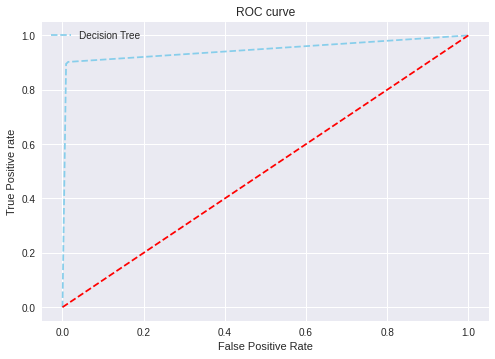

In [101]:
#Plotting AUC-ROC Curve
plt.style.use('seaborn')
plt.plot(fpD, tpD, linestyle='--',color='skyblue', label='Decision Tree')
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [102]:
#We have seen all the 5 Models. Now, chossing the best of all 5 models and below are the results:

#Model Results
#1.Logistic Regression:									                                                   Matrix
#       Accuracy of Logistic regression classifier on test set:            95.47%		 [[13e+03   18]
#       Accuracy of Logistic regression classifier on train set:           95.69%     [    50   94]]
#	      Precision When it predicts yes, how often is it correct:           83.93%
#	      AUC_Score:                                                         96.57%  

#2.Random Forest	  
#       Accuracy of Random Forest classifier on test set:                  98.53%		 [[14e+03         5]
#       Accuracy of Random Forest classifier on train set:                 99.69%     [    17   1.3e+02]]
#	      Precision When it predicts yes, how often is it correct:           96.21%
#	      AUC_Score:                                                         99.66%

#3.KNN	  
#       Accuracy of KNN classifier on test set:                            96.27%		 [[14e+03   5]
#	      Accuracy of KNN classifier on train set:                           96.86%		  [    51  93]]
#	      Precision When it predicts yes, how often is it correct:           94.90%
#       AUC_Score:                                                         93.67%

#4.Naive Bayes
#       Accuracy of Naive Bayes classifier on test set:                    91.33%		 [[13e+03         63]
#       Accuracy of Naive Bayes classifier on train set:                   90.86%     [    67         77]]
#	      Precision When it predicts yes, how often is it correct:           55.01%
#	      AUC_Score:                                                         93.93%

#5.Decision Tree 	  
#       Accuracy of Decision Tree classifier on test set:                  98.13%		 [[13e+03        13]
#       Accuracy of Decision Tree classifier on train set:                 99.71%     [    15   1.3e+02]]
#	      Precision When it predicts yes, how often is it correct:           90.85%
#	      AUC_Score:                                                         94.65%

In [ ]:
#Random Forest model performs the best, evident from above results.
#The yes prediction is on lower side as data is not balanced. Data was not altered as figure represented the 
#true picture of market i.e. person who took loan are on lower side.
#If we apply the model and change our approach and target only those predicted as yes first, it is 96% (Precision)
#chance they will take loan. Hence our chances that a person takes personal loan increases.
#And we end up offering more loans at end of program
#To conclude, We have applied what We have learned till now. Further apart from the above used models we can apply other techniques like Neural Networks, 
#Support Vector Machine, Apriori, K Means Clustering, etc and use regularization and then compare the results to see if model improves further.

#Summary:

'''The points which We analysed from the above findings.
1.The given dataset contains data of 5000 customers.
2.It does not contain any null-values.
3.We got to know that our Experience data column conatains some neagtive values from description of each column.
4.ID's of customers had nothing to do with the loan so we dropped that column.
5.Then from analysis of hashmap we got that Age and Experience are highly correlated and since Experience column had some negative values so we
  dropped that column as well.
6.Then we found that ZIP Code column contains 467 different zip codes, which is of no use as it had no effect on our dataset so we dropped that as well.
7.We also found from various analysis that Income, Mortgage and CCAvg column are skewed.
8.People with high Income are less.
9.There are more number of customers having low CCAvg spending per month.
10.Then we applied some scaling techniques to scale our dataset
11.Then we compared various training models and alll the models seem to work well but we chose best suitable model for our data. On comaring we got that 
   Random Forest classifier was giving better results that other models and hence it gives best results.  
Made By: Vasvee Singh'''